In [5]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer
import string
import re
from sklearn.feature_extraction.text import CountVectorizer

In [13]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

In [6]:
train=pd.read_csv('twittertrain.csv')
test=pd.read_csv('twittertest.csv')

In [7]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [8]:
print(train.shape)
test.shape

(7613, 5)


(3263, 4)

In [9]:
train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [10]:
train=train.drop(columns=['id','keyword','location'])
train
         

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...
7608,Two giant cranes holding a bridge collapse int...,1
7609,@aria_ahrary @TheTawniest The out of control w...,1
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,Police investigating after an e-bike collided ...,1


In [11]:
train.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [12]:
feat=train[['text']]
label=train[['target']]

In [14]:
ps=PorterStemmer()
wordnet=WordNetLemmatizer()

In [15]:
all_stopwords=stopwords.words('english')
all_stopwords.remove('not')

In [16]:
def preprocessing(data):
    corpus=[]
    for i in range(len(data)):
        #remove urls
        tweet=re.sub(r'http\S+',' ',data[i])
        
        #remove html tags
        tweet=re.sub(r'<.*?>',' ',tweet)
        tweet=re.sub('@\w+([-.]\w+)*',' ',tweet)
        tweet=re.sub('&\w+([-.]\w+)*',' ',tweet)
        
        #remove digits
        tweet=re.sub(r'\d+',' ',tweet)
        
        #remove hashtags
        tweet=re.sub(r'#\w+',' ',tweet)
        #remove punctuations and numbers
        review=re.sub('[^a-zA-Z]',' ',tweet)
        review=review.lower()
        review=review.split()
        
        #review=expand_contractions(review)
        lemma=WordNetLemmatizer()
        review=[lemma.lemmatize(word) for word in review if word not in all_stopwords]
        review=' '.join(review)
        corpus.append(review)
    return corpus

In [17]:
feat.head()

,text
0,Our Deeds are the Reason of this #earthquake M...
1,Forest fire near La Ronge Sask. Canada
2,All residents asked to 'shelter in place' are ...
3,"13,000 people receive #wildfires evacuation or..."
4,Just got sent this photo from Ruby #Alaska as ...


In [18]:
feat['text']=preprocessing(feat['text'])

/var/folders/ft/nr64ylkn0lqb43gh8m5vvy3h0000gn/T/ipykernel_12086/386183970.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat['text']=preprocessing(feat['text'])


In [19]:
feat.head()

,text
0,deed reason may allah forgive u
1,forest fire near la ronge sask canada
2,resident asked shelter place notified officer ...
3,people receive evacuation order california
4,got sent photo ruby smoke pours school


In [20]:
#Model Building
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [21]:
#preprocessing the text data
test=test.drop(columns=['id','keyword','location'])
test

,text
0,Just happened a terrible car crash
1,"Heard about #earthquake is different cities, s..."
2,"there is a forest fire at spot pond, geese are..."
3,Apocalypse lighting. #Spokane #wildfires
4,Typhoon Soudelor kills 28 in China and Taiwan
...,...
3258,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,Storm in RI worse than last hurricane. My city...
3260,Green Line derailment in Chicago http://t.co/U...
3261,MEG issues Hazardous Weather Outlook (HWO) htt...


In [22]:
test['text']=preprocessing(test['text'])
test.head()

,text
0,happened terrible car crash
1,heard different city stay safe everyone
2,forest fire spot pond goose fleeing across str...
3,apocalypse lighting
4,typhoon soudelor kill china taiwan


In [23]:
test.shape

(3263, 1)

In [24]:
tfidf=TfidfVectorizer(min_df=1,stop_words='english')

xtrain_feat=tfidf.fit_transform(feat.text)
xtest_feat=tfidf.transform(test.text)

ytrain=label.astype("int")

In [26]:
print(xtrain_feat)

  (0, 3826)	0.5404321307842656
  (0, 260)	0.5091998116723592
  (0, 8126)	0.3957041518922832
  (0, 2463)	0.5404321307842656
  (1, 1428)	0.4041746272133468
  (1, 8722)	0.5013434889003477
  (1, 8540)	0.5013434889003477
  (1, 5576)	0.3622437862730083
  (1, 6734)	0.3216119529304211
  (1, 3819)	0.31511501714498075
  (2, 3418)	0.2516652226079931
  (2, 7111)	0.22037114836821514
  (2, 3343)	0.2102667513754822
  (2, 6993)	0.22843460285459039
  (2, 6883)	0.324702456667253
  (2, 7536)	0.45686920570918077
  (2, 8995)	0.5722307285742921
  (2, 537)	0.271874016593459
  (2, 8344)	0.2760109672944131
  (3, 1401)	0.36584391607961997
  (3, 8143)	0.6216887930842094
  (3, 7395)	0.32808871029845726
  (3, 7111)	0.44128642622120473
  (3, 3343)	0.4210526829609798
  (4, 8776)	0.30373294586187666
  :	:
  (7610, 4482)	0.551138418251355
  (7610, 10676)	0.49411136471938033
  (7610, 5516)	0.47780029676663055
  (7610, 10838)	0.4730827407465482
  (7611, 9730)	0.2944433018935361
  (7611, 7659)	0.30434876395084237
  (7611

In [27]:
test_copy=pd.read_csv("twittertest.csv")

In [34]:
X_train, X_test, Y_train, Y_test=train_test_split(xtrain_feat,ytrain,test_size=0.2,random_state=2)
print("Train set: ",X_train.shape,Y_train.shape)
print("Test set: ",X_test.shape,Y_test.shape)

Train set:  (6090, 11366) (6090, 1)
Test set:  (1523, 11366) (1523, 1)


In [35]:
Y_test.shape

(1523, 1)

In [38]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [40]:
parameters={"C":[0.01,0.1,1],'penalty':['l2'],'solver':['lbfgs']}# l1 lasso l2 

ridgelr=LogisticRegression()

gscv=GridSearchCV(ridgelr,parameters,scoring='accuracy',cv=10)

logreg_cv=gscv.fit(X_train,Y_train)



/Users/xiaoqin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/xiaoqin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/xiaoqin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/xiaoqin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was e

In [41]:
#Calculate the accuracy on the train data using the method score:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.7914614121510672


In [64]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax,fmt=".1f"); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1'])

In [65]:
#Calculate the accuracy on the test data using the method score:
logreg_cv.score(X_test,Y_test)

0.7872619829284307

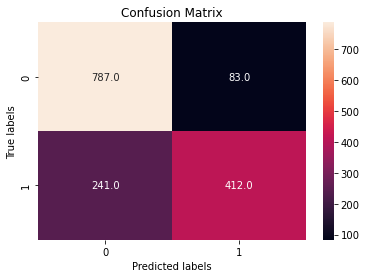

In [66]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)